<a href="https://colab.research.google.com/github/Devansharma/Time_Series_Analysis/blob/master/Time_Series_using_Prophet_Trend_Non_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')

In [3]:
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [4]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Profits')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                     dict(count=1, label='1y', step='year', stepmode='backward'),
                     dict(count=2, label='2y', step='year', stepmode='backward'),
                     dict(count=3, label='3y', step='year', stepmode='backward'),
                     dict(step='all')
        ])
    )
)
fig.show()

In [6]:
from fbprophet import Prophet

In [7]:
amazon_df = df[['Quarter', 'Revenue']].rename({'Quarter': 'ds',
                                               'Revenue': 'y'}, axis='columns')

In [8]:
amazon_df

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [9]:
train = amazon_df[(amazon_df['ds']>= '2005-03-31')&(amazon_df['ds']<='2019-03-31')]
test = amazon_df[(amazon_df['ds']>'2019-03-31')]

In [10]:
print(train.shape)
print(test.shape)

(57, 2)
(4, 2)


In [11]:
model = Prophet(interval_width=0.95)

In [12]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = model.make_future_dataframe(periods=4, freq='Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [14]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496722,57110.946478,65035.995367
57,2019-06-30,63195.117248,59368.504108,67150.371275
58,2019-09-30,66153.769201,62435.418299,70285.703362
59,2019-12-31,74249.538212,70082.731356,78314.572524
60,2020-03-31,70663.367647,66493.116650,74759.923694


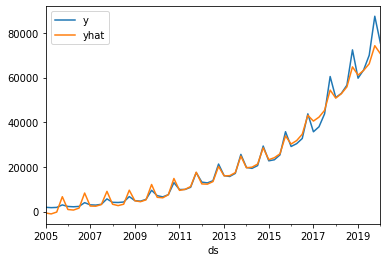

In [15]:
pd.concat([amazon_df.set_index('ds')['y'], forecast.set_index('ds')['yhat']],axis=1).plot()

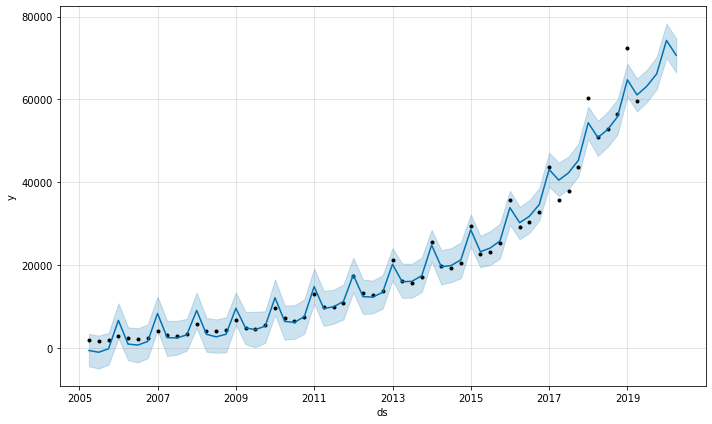

In [16]:
fig1 = model.plot(forecast)

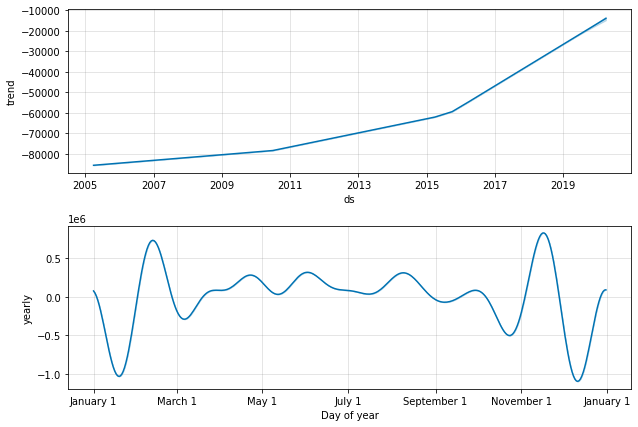

In [17]:
fig2 = model.plot_components(forecast)

In [18]:
holiday_sale = pd.DataFrame({
   'holiday': 'dec_jan_sale',
   'ds': pd.to_datetime(['2019-12-31', '2018-12-31', '2017-12-31',
                         '2016-12-31', '2015-12-31', '2014-12-31',
                         '2013-12-31', '2012-12-31', '2011-12-31', 
                         '2010-12-31', '2009-12-31', '2008-12-31',
                         '2007-12-31', '2006-12-31', '2005-12-31', ]),
  'lower_window':0,
  'upper_window':1, 
})

In [19]:
holiday_sale

,holiday,ds,lower_window,upper_window
0,dec_jan_sale,2019-12-31,0,1
1,dec_jan_sale,2018-12-31,0,1
2,dec_jan_sale,2017-12-31,0,1
3,dec_jan_sale,2016-12-31,0,1
4,dec_jan_sale,2015-12-31,0,1
5,dec_jan_sale,2014-12-31,0,1
6,dec_jan_sale,2013-12-31,0,1
7,dec_jan_sale,2012-12-31,0,1
8,dec_jan_sale,2011-12-31,0,1
9,dec_jan_sale,2010-12-31,0,1


In [20]:
model2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative',
                 holidays=holiday_sale)

In [21]:
model2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60098.589527,58186.348814,62026.316966
57,2019-06-30,62627.734827,60724.975662,64282.484114
58,2019-09-30,67792.982748,65911.271980,69670.023847
59,2019-12-31,89317.926197,87268.777935,91261.607081
60,2020-03-31,66836.358707,64851.523874,68767.468203


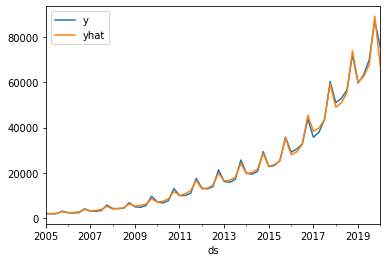

In [23]:
pd.concat([amazon_df.set_index('ds')['y'], forecast.set_index('ds')['yhat']],axis=1).plot()

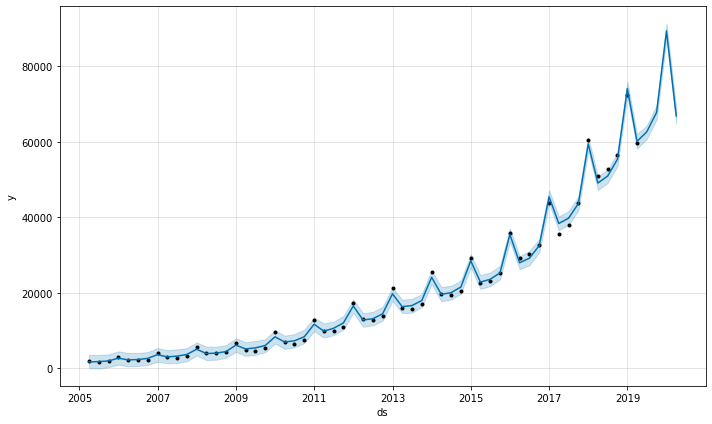

In [24]:
fig1 = model2.plot(forecast)

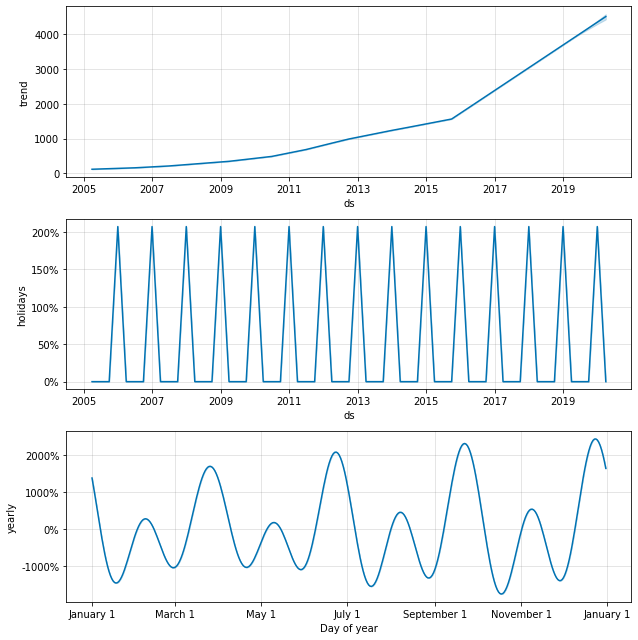

In [25]:
fig2 = model2.plot_components(forecast)